<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [128]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [8]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [11]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

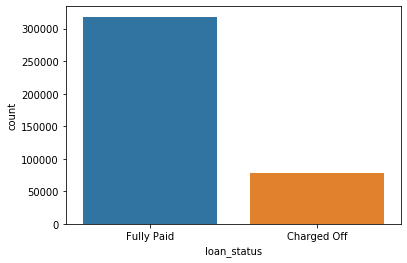

In [12]:
sns.countplot(x='loan_status',data=df)

**TASK: Create a histogram of the loan_amnt column.**

(array([2.7420e+03, 7.4500e+03, 1.0489e+04, 1.2791e+04, 2.0755e+04,
        2.2033e+04, 1.6495e+04, 2.1415e+04, 1.4714e+04, 3.7229e+04,
        1.2498e+04, 2.7261e+04, 9.8230e+03, 1.0588e+04, 2.6409e+04,
        1.4103e+04, 7.0870e+03, 1.3769e+04, 5.8370e+03, 2.2546e+04,
        8.0130e+03, 4.7010e+03, 3.7470e+03, 1.0780e+04, 1.1336e+04,
        2.2570e+03, 2.1860e+03, 6.9460e+03, 1.4940e+03, 8.0720e+03,
        8.9700e+02, 1.9290e+03, 1.2930e+03, 1.0300e+03, 1.5054e+04,
        5.0000e+01, 1.2000e+01, 8.0000e+00, 6.0000e+00, 1.8500e+02]),
 array([  500. ,  1487.5,  2475. ,  3462.5,  4450. ,  5437.5,  6425. ,
         7412.5,  8400. ,  9387.5, 10375. , 11362.5, 12350. , 13337.5,
        14325. , 15312.5, 16300. , 17287.5, 18275. , 19262.5, 20250. ,
        21237.5, 22225. , 23212.5, 24200. , 25187.5, 26175. , 27162.5,
        28150. , 29137.5, 30125. , 31112.5, 32100. , 33087.5, 34075. ,
        35062.5, 36050. , 37037.5, 38025. , 39012.5, 40000. ]),
 <a list of 40 Patch objects>)

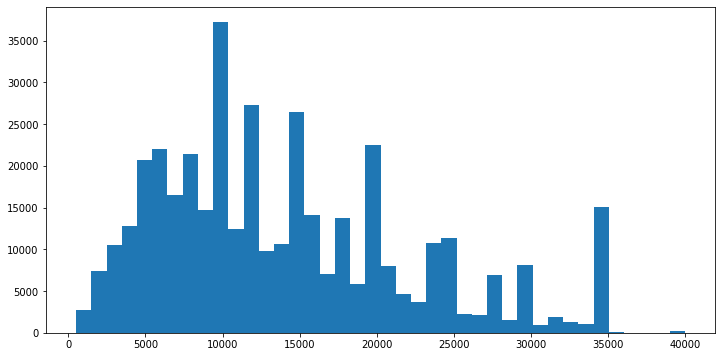

In [13]:
plt.figure(figsize=(12,6))
plt.hist(x=df['loan_amnt'],bins=40)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [14]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [15]:
df[df['loan_status'] == 'Charged Off']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
25,6000.0,36 months,11.36,197.47,B,B5,CSU Monterey Bay,2 years,RENT,46680.0,...,9.0,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A..."
26,8400.0,36 months,13.35,284.45,C,C2,Bartender,6 years,RENT,35000.0,...,6.0,0.0,6953.0,74.8,17.0,f,INDIVIDUAL,0.0,0.0,Unit 3166 Box 1862\nDPO AE 48052
36,3250.0,36 months,16.78,115.52,C,C5,NaN,NaN,RENT,22500.0,...,7.0,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\nLake Mariaton, TN 30723"
41,28000.0,60 months,19.91,312.04,E,E4,American Airlines,10+ years,RENT,52000.0,...,10.0,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396000,10000.0,36 months,12.85,336.22,B,B4,Maint. supervisor,10+ years,MORTGAGE,95000.0,...,9.0,1.0,5718.0,57.8,37.0,w,INDIVIDUAL,6.0,1.0,"66798 Jessica Avenue Apt. 921\nPort Angela, NM..."
396001,15000.0,60 months,15.61,361.67,D,D1,Operation Supervisor,10+ years,MORTGAGE,47000.0,...,9.0,0.0,4621.0,55.0,15.0,w,INDIVIDUAL,1.0,0.0,"1398 Allen Mission\nAdrianstad, ME 22690"
396002,17500.0,36 months,13.66,595.23,C,C3,Sales Consaltant,< 1 year,RENT,70000.0,...,22.0,0.0,16637.0,88.0,42.0,f,INDIVIDUAL,0.0,0.0,"127 Gregory Vista\nFowlerville, AZ 70466"
396011,13000.0,36 months,10.99,425.55,B,B4,Probation Officer,10+ years,RENT,56000.0,...,6.0,0.0,9964.0,64.3,23.0,w,INDIVIDUAL,3.0,0.0,"7359 Stone Land\nWest Josefurt, SC 30723"


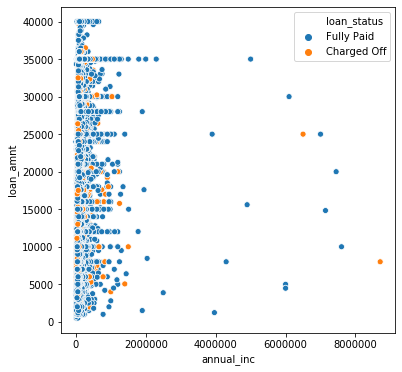

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='annual_inc',y='loan_amnt',data=df,hue='loan_status')

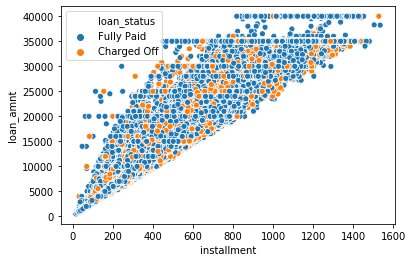

In [17]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,hue='loan_status')

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

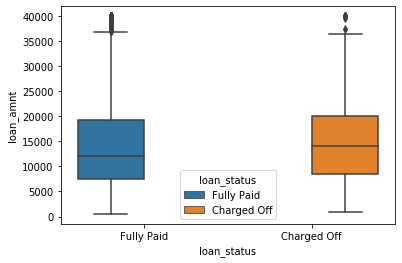

In [18]:
sns.boxplot(x=df['loan_status'],y=df['loan_amnt'],hue=df['loan_status'])

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [19]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [20]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

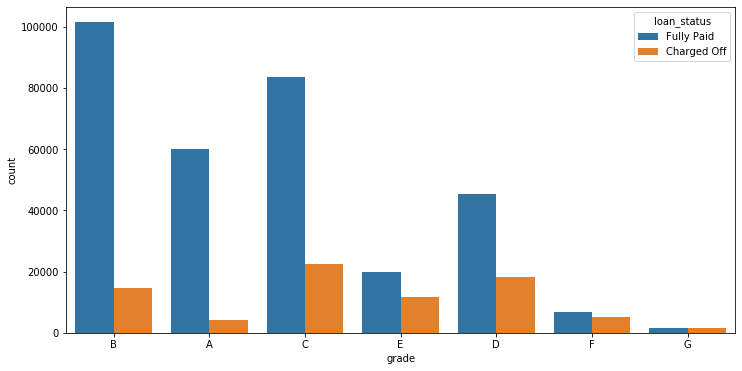

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade',data=df,hue='loan_status')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

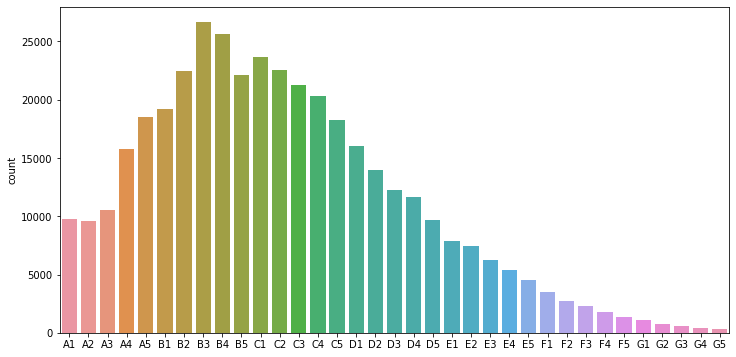

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(x=sorted(df['sub_grade']))

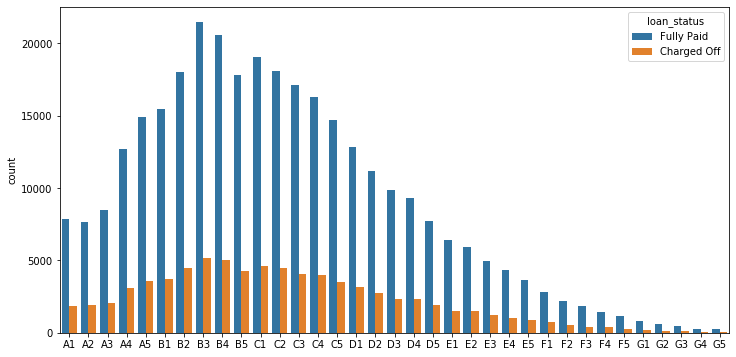

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(x=sorted(df['sub_grade']),hue=df['loan_status'])

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [22]:
loan_repaid = pd.get_dummies(df['loan_status'])

In [23]:
loan_repaid = []
for i in df['loan_status']:
    if(i == 'Fully Paid'):
        loan_repaid.append(1)
    else:
        loan_repaid.append(0)

In [24]:
loan_repaid

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,


In [25]:
df['loan_repaid'] = loan_repaid

In [26]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

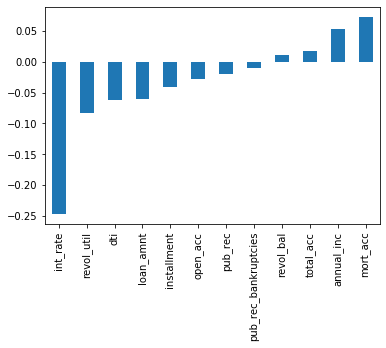

In [17]:
df.corr()['loan_repaid'].sort_values()[:12].plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [27]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [28]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [29]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [30]:
(df.isnull().sum() * 100)/396030

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: How many unique employment job titles are there?**

In [31]:
df['emp_title'].nunique()

173105

In [32]:
df['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
Warehouse Bank Specialist            1
Driller/Blaster                      1
IT Manager AVP                       1
Operations/Program Coordinator       1
Cpl. Detentions                      1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [33]:
df.drop('emp_title',inplace=True,axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [34]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [35]:
new_emp_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

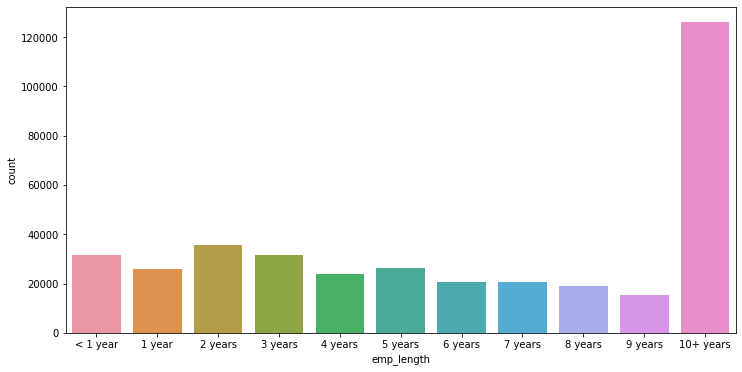

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order=new_emp_order)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

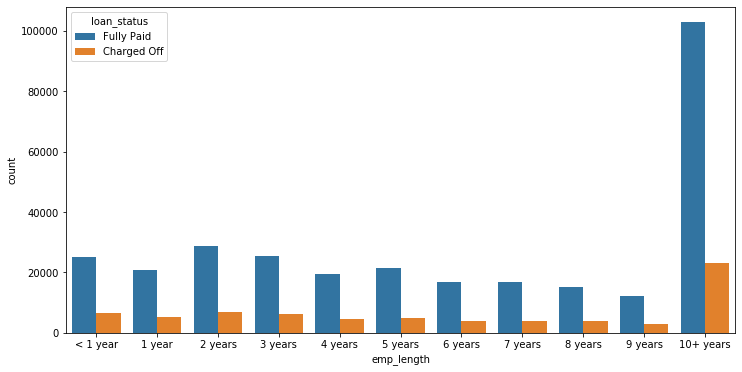

In [101]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order=new_emp_order,hue='loan_status')

**Charge off rates and also Fully paid rates are extremely similar across all employment lengths. So emp_length wont actully effect the model in any means as for every emp length the charge off rates and fully paid rataes are similar i.e (~20% and ~80%) respt Go ahead and drop the emp_length column and also if there is emp length feature itll always have bias and therefore itll bias it to Fully Charged category as ~80% people in each category pays their loan.**

In [36]:
df.drop('emp_length',inplace=True,axis =1 )

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [38]:
df['title'].nunique()

48817

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [39]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

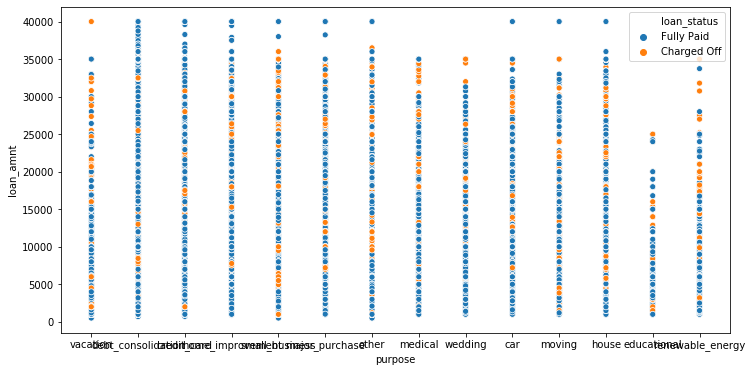

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['purpose'],y=df['loan_amnt'],hue=df['loan_status'])

In [41]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [42]:
df.drop('title',inplace=True,axis=1)

**TASK: Create a value_counts of the mort_acc column.**

In [43]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [44]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [45]:
df['total_acc'].nunique()

118

In [46]:
valtofill = df.groupby('total_acc').mean()['mort_acc'] #So basically taking mean of all values of mort_acc wrt to all unique total_acc values 

In [47]:
df['total_acc']

0         25.0
1         27.0
2         26.0
3         13.0
4         43.0
          ... 
396025    23.0
396026     8.0
396027    23.0
396028    20.0
396029    19.0
Name: total_acc, Length: 396030, dtype: float64

In [48]:
df[df['total_acc'] == 26.0]['mort_acc'].mean()

1.9874138957394336

In [49]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [50]:
valtofill[19.0]

1.3580128970623357

#### So basically total_acc corelates more with mort_acc so what we did is we found the mean of mort_acc with respect to total_acc and now corresponding values to what total_acc values are we are going to fill in those mean values for example total acc at 396029 index is 19.0 we took all mort_acc values who had their total_acc value as 19.0 and made mean of those value and mort_acc at 396029 is empty we filled that empty(NaN) value with the mean value we just found

In [51]:
np.isnan(1)

False

In [52]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [53]:
valtofill

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [54]:
mort_acc1 = []
for i,j in zip(df['mort_acc'],df['total_acc']):
    if(np.isnan(i)):
        mort_acc1.append(valtofill[j])
    else:
        mort_acc1.append(i)

In [55]:
df['mort_acc'] = mort_acc1

In [56]:
df['mort_acc']

0         0.000000
1         3.000000
2         0.000000
3         0.000000
4         1.000000
            ...   
396025    0.000000
396026    1.000000
396027    0.000000
396028    5.000000
396029    1.358013
Name: mort_acc, Length: 396030, dtype: float64

In [57]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [58]:
df.dropna(inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [61]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [62]:
date=[]
for i in df['term']:
    date.append(int(i.split(sep=' ')[1]))

In [63]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

In [64]:
df['term'] = date

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [66]:
df['sub_grade']

0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 395219, dtype: object

In [67]:
realsubgrade2 = pd.get_dummies(df['sub_grade'],drop_first=True)

In [68]:
df = pd.concat([df.drop('sub_grade',axis=1),realsubgrade2],axis=1)

In [69]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [70]:
df

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,C,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,C,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
A2                      0
A3                      0
A4                      0
A5                      0
B1                      0
B2                      0
B3                      0
B4                      0
B5                      0
C1                      0
C2                      0
C3                      0
C4                      0
C5                      0
D1          

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [72]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [76]:
df

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,issue_d,loan_status,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Jan-2015,Fully Paid,26.24,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Jan-2015,Fully Paid,12.79,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Nov-2014,Fully Paid,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,RENT,40000.0,Oct-2015,Fully Paid,15.63,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,C,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B,RENT,56500.0,Oct-2013,Fully Paid,17.56,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,C,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,...,0,0,0,0,0,0,0,0,0,0


### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [68]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [77]:
df['home_ownership']= df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [78]:
dumms4 = pd.get_dummies(df['home_ownership'],drop_first=True)

In [79]:
df = df.drop('home_ownership',axis=1)

In [80]:
df = pd.concat([df,dumms4],axis=1)

In [81]:
df

,loan_amnt,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,B,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,B,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,A,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,C,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,C,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,C,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,0,0,0,0


### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [95]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [106]:
zipcodes = []
for i in df['address']:
    zipcodes.append(i[-5:])

In [109]:
df['zipcodes'] = zipcodes

In [111]:
df['zipcodes'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [113]:
dummies = pd.get_dummies(df['zipcodes'],drop_first=True)

In [115]:
df = df.drop(['zipcodes','address'],axis = 1)

In [117]:
df = pd.concat([df,dummies],axis = 1)

In [122]:
df

,loan_amnt,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,B,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,C,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,C,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,1,0,0,0,0,0


### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [126]:
df.drop('issue_d',axis=1,inplace=True)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [133]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [135]:
df.drop('loan_status',axis=1,inplace=True)

In [142]:
df.drop('grade',axis=1,inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc     

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [145]:
from sklearn.model_selection import train_test_split

**TASK: Set X and y variables to the .values of the features and label.**

In [415]:
y = df1['loan_repaid'].values

In [416]:
X = df1.drop('loan_repaid',axis=1).values

In [417]:
X

array([[1.480e+04, 3.600e+01, 1.849e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.100e+04, 6.000e+01, 1.757e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.200e+04, 6.000e+01, 7.890e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.620e+04, 6.000e+01, 2.075e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.100e+04, 6.000e+01, 2.099e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.600e+03, 3.600e+01, 1.064e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [413]:
df1 = df.sample(frac=0.1,random_state=101)
print(len(df1))

39522


In [414]:
df1

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
204901,14800.0,36,18.49,538.71,104540.0,13.12,10.0,0.0,21241.0,60.9,...,1,1,0,0,0,0,0,0,0,0
226870,31000.0,60,17.57,779.97,122000.0,27.46,20.0,0.0,36941.0,55.1,...,0,0,0,0,1,0,0,0,0,0
241733,22000.0,60,7.89,444.93,71400.0,21.29,9.0,0.0,5212.0,41.7,...,1,0,0,0,0,0,0,0,0,0
225481,20000.0,36,10.78,652.70,100000.0,17.86,14.0,0.0,11139.0,38.9,...,0,0,0,1,0,0,0,0,0,0
104657,18625.0,60,17.57,468.61,41500.0,18.80,20.0,0.0,27975.0,38.9,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325989,24000.0,36,6.97,740.73,180000.0,2.65,10.0,0.0,4604.0,8.5,...,0,0,0,0,0,0,0,1,0,0
123186,12800.0,36,14.47,440.41,62000.0,20.54,10.0,0.0,16704.0,91.3,...,0,0,0,0,0,1,0,0,0,0
33157,16200.0,60,20.75,435.99,45000.0,26.51,19.0,1.0,9410.0,57.7,...,0,0,0,0,0,0,0,1,0,0
232425,21000.0,60,20.99,568.01,98000.0,17.63,14.0,0.0,34456.0,83.4,...,1,0,0,0,0,0,0,0,0,0


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [418]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Normalizing the Data


In [419]:
from sklearn.preprocessing import MinMaxScaler

In [420]:
scaler = MinMaxScaler()

In [421]:
X_train = scaler.fit_transform(X_train)

In [422]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [428]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here
OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [438]:
model = Sequential()

In [439]:
model.add(Dense(78 ,activation = 'linear'))
model.add(Dropout(0.2))
model.add(Dense(39,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(18,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1  ,activation = 'sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [440]:
model.fit(X_train,y_train,batch_size=256,epochs=25,validation_data=(X_test,y_test))

Train on 31617 samples, validate on 7905 samples
Epoch 1/25
31617/31617 [==============================] - 7s 225us/sample - loss: 0.4536 - val_loss: 0.3529
Epoch 2/25
31617/31617 [==============================] - 2s 62us/sample - loss: 0.3211 - val_loss: 0.2809
Epoch 3/25
31617/31617 [==============================] - 2s 63us/sample - loss: 0.2869 - val_loss: 0.2762
Epoch 4/25
31617/31617 [==============================] - 2s 63us/sample - loss: 0.2798 - val_loss: 0.2739
Epoch 5/25
31617/31617 [==============================] - 2s 62us/sample - loss: 0.2757 - val_loss: 0.2714
Epoch 6/25
31617/31617 [==============================] - 2s 62us/sample - loss: 0.2739 - val_loss: 0.2717
Epoch 7/25
31617/31617 [==============================] - 2s 63us/sample - loss: 0.2703 - val_loss: 0.2713
Epoch 8/25
31617/31617 [==============================] - 2s 63us/sample - loss: 0.2709 - val_loss: 0.2736
Epoch 9/25
31617/31617 [==============================] - 2s 63us/sample - loss: 0.2683 - val_

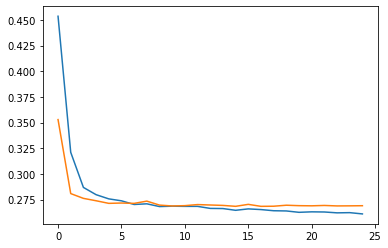

In [441]:
plt.plot(pd.DataFrame(model.history.history))

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [442]:
from sklearn.metrics import classification_report,confusion_matrix

In [445]:
preds = model.predict_classes(X_test)

In [446]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.92      0.72      0.77      7905
weighted avg       0.89      0.88      0.87      7905



In [447]:
print(confusion_matrix(y_test,preds))

[[ 685  885]
 [  33 6302]]


**TASK: Given the customer below, would you offer this person a loan?**

In [448]:
new_customer = df.drop('loan_repaid',axis=1).iloc[100]
new_customer

loan_amnt      17000.00
term              36.00
int_rate           7.51
installment      528.89
annual_inc     87000.00
                 ...   
30723              0.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 100, Length: 77, dtype: float64

In [452]:
model.predict_classes(new_customer.values.reshape(1,77))

array([[1]])

In [453]:
df['loan_repaid'].iloc[100]

1

# GREAT JOB!